In [11]:
#import different packages
import pandas as pd
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLO

In [12]:
#load coaches csv into a pandas data frame
coaches = pd.read_csv('Coaches9.csv')

#clean data
coaches = coaches.replace('--', np.NaN)
coaches[coaches.columns[3:]]=coaches[coaches.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
coaches['School'] = coaches['School'].astype(str)
coaches.dtypes

#remove schools that have NaN for Total Pay
coaches.count()
coaches[coaches['TotalPay'].isnull()]
coaches = coaches.dropna(subset=['TotalPay'])
coaches.count()

#5 schools removed
coaches.head()


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,NaN,0.0,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0


In [16]:
#load in stadium table from wikipedia into a table and clean data 
#stadium = pd.read_html('https://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity')
stadium = pd.read_html('http://www.collegegridirons.com/comparisons.htm')
stadiums = stadium[0]


#clean data
#stadiums = stadiums.drop(stadiums.index[:14])
#stadiums = stadiums.filter([0,1,2,3,4], axis=1)
#stadiums.columns = ['Stadium','School','Conference','Capacity','Opened']
#stadiums['Capacity'] = stadiums['Capacity'].astype(float)
#stadiums['School'] = stadiums['School'].astype(str)
#stadiums.dtypes
#stadiums.count()
stadiums


,0,1,2
0,NaN,HOME COMPARISONS SEATING CHARTS TICKETS FAN EX...,NaN
1,NaN,College Football Stadium Comparisons SORTED A...,googletag.defineSlot('/7103/SMG_CollegeGridiro...
2,NaN,googletag.defineSlot('/7103/SMG_CollegeGridiro...,googletag.defineSlot('/7103/SMG_CollegeGridiro...


In [20]:
#load in win loss record data
winloss = pd.read_html('https://www.sports-reference.com/cfb/years/2017-standings.html')
#clean data
winloose = winloss[0]
winloose.columns = ['Rank','School','Conference','WinsOverall','LossesOverall','WinPCTOverall','WinsinConference','LossesinConference','WinPCTCon','PPGO','PPGD','SRS','SOS','APPRE','APHI','APRank','Notes']
winloose = winloose.drop(columns=['Notes'])

#fill N/A's specifically for rank with 0's
#winloose = winloose.fillna(0)

#clean data
#winloose = winloose[~winloose.Rank.str.contains("Rk",na=True)]
#winloose['Rank'] = winloose['Rank'].astype(float)
#winloose['WinsOverall'] = winloose['WinsOverall'].astype(float)
#winloose['LossesOverall'] = winloose['LossesOverall'].astype(float)
#winloose['WinPCTOverall'] = winloose['WinPCTOverall'].astype(float)
#winloose['WinsinConference'] = winloose['WinsinConference'].astype(float)
#winloose['LossesinConference'] = winloose['LossesinConference'].astype(float)
#winloose['WinPCTCon'] = winloose['WinPCTCon'].astype(float)
#winloose['PPGO'] = winloose['PPGO'].astype(float)
#winloose['PPGD'] = winloose['PPGD'].astype(float)
#winloose['SRS'] = winloose['SRS'].astype(float)
#winloose['SOS'] = winloose['SOS'].astype(float)
#winloose['APPRE'] = winloose['APPRE'].astype(float)
#winloose['APHI'] = winloose['APHI'].astype(float)
#winloose['APRank'] = winloose['APRank'].astype(float)
#winloose.dtypes
winloose.head()
#winloose.count()

,Rank,School,Conference,WinsOverall,LossesOverall,WinPCTOverall,WinsinConference,LossesinConference,WinPCTCon,PPGO,PPGD,SRS,SOS,APPRE,APHI,APRank
0,1,Clemson,ACC (Atlantic),12,2,.857,7,1,.875,33.3,13.6,20.62,6.84,5,1,4
1,2,North Carolina State,ACC (Atlantic),9,4,.692,6,2,.750,32.2,25.2,12.17,5.55,NaN,14,23
2,3,Louisville,ACC (Atlantic),8,5,.615,4,4,.500,38.1,27.4,9.67,3.75,16,14,NaN
3,4,Wake Forest,ACC (Atlantic),8,5,.615,4,4,.500,35.3,28.3,11.42,6.03,NaN,NaN,NaN
4,5,Boston College,ACC (Atlantic),7,6,.538,4,4,.500,25.7,22.8,9.39,7.08,NaN,NaN,NaN


In [5]:
#load graduation csv into a pandas data frame
gsr = pd.read_csv('graduation.csv')

#Calculate the male GSR for for football for 2011 to see if GSR has an effect Salary
gsr1 = gsr[(gsr['SPORT_CODE_SA'] == 'MFB') & (gsr['GENDER_SA'] == 'M')]

#gsr1.dtypes
gsr1 = gsr1.filter(['SPORT_CODE_SA','GENDER_SA','GSR_NUM_2011_SA','GSR_DEN_2011_SA'], axis=1)

#gsr1 = gsr1.columns = ['GSR_NUM_2011_SA','GSR_DEN_2011_SA']
gsr1.head()
gr= (gsr1['GSR_NUM_2011_SA'].sum()/gsr1['GSR_DEN_2011_SA'].sum())
gr

0.786322869955157

In [6]:
#match the coaches, stadium, and winloose data set together
coacheswin = (pd.merge(coaches, winloose, on='School'))
coacheswin
coacheswin.count()
coacheswin = coacheswin.drop(columns=['Conference_y'])

#install and load in fuzzywuzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#look at difference between coaches and win/loss
#print(fuzz.WRatio(stadiums['School'],coacheswin['School']))

#process.extractOne(stadiums['School'],coacheswin['School'])
final = coacheswin = (pd.merge(coacheswin, stadiums, on='School'))
final = final.drop(columns=['Conference'])
final = final.assign(GSR = gr)
print(final.shape)
final.head()





(104, 27)


,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,...,PPGD,SRS,SOS,APPRE,APHI,APRank,Stadium,Capacity,Opened,GSR
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,NaN,0.0,NaN,84.0,...,32.4,-4.77,-1.02,0.0,0.0,0.0,Falcon Stadium,52237.0,1962,0.786323
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,69.0,...,28.0,-4.82,-1.96,0.0,0.0,0.0,InfoCision Stadium,30000.0,2009,0.786323
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,112.0,...,11.9,21.25,5.46,1.0,1.0,1.0,Bryant Denny Stadium,101821.0,1929,0.786323
3,Arizona,Pac-12,Kevin Sumlin,1600000.0,2000000.0,2025000.0,NaN,0.0,10000000.0,101.0,...,34.4,3.17,-0.98,0.0,23.0,0.0,Arizona Stadium,56037.0,1928,0.786323
4,Arizona State,Pac-12,Herm Edwards,2000000.0,2000000.0,3010000.0,NaN,0.0,8166667.0,100.0,...,32.8,3.80,3.72,0.0,0.0,0.0,Sun Devil Stadium,56232.0,1958,0.786323


count        104.0
mean     2598945.0
std      1932860.0
min       390000.0
25%       882144.0
50%      2146319.0
75%      3759479.0
max      8307000.0
Name: TotalPay, dtype: float64


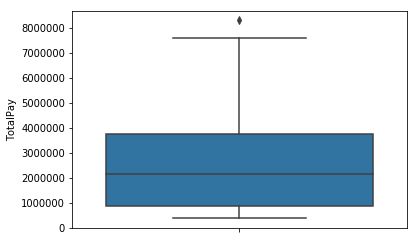

None


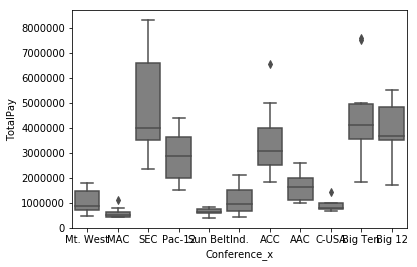

None


C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  
C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.786322869955157, right=0.786322869955157
  'left=%s, right=%s') % (left, right))
C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.786322869955157, right=0.786322869955157
  'left=%s, right=%s') % (left, right))
C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatical

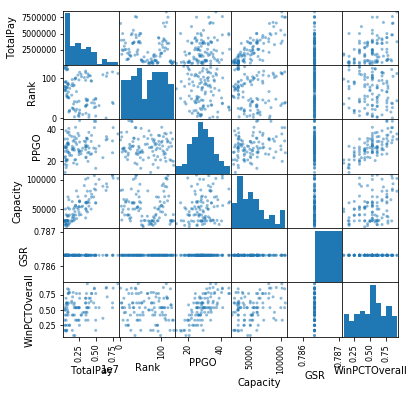

None


In [7]:
#Sumary Statistics
print(round(final['TotalPay'].describe(),0))

#Pay Across All Conferences
np.mean(final['TotalPay'])
sns.boxplot(y="TotalPay", data=final)
print(plt.show())

#Pay by Conference
sns.boxplot(x="Conference_x", y="TotalPay", data=final, color = "gray")
print(plt.show())

final1 = final[['Conference_x','TotalPay','Rank','PPGO','Capacity','GSR','WinPCTOverall']]
pd.scatter_matrix(final1, figsize=(6, 6))
print(plt.show())





In [8]:
#Build A Model
# employ training-and-test regimen for model validation
np.random.seed(1234)
final['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(final))
final_train = final[final['runiform'] >= 0.33]
final_test = final[final['runiform'] < 0.33]
# check training data frame
print('\final_train data frame (rows, columns): ',final_train.shape)
print(final_train.head())
# check test data frame
print('\final_test data frame (rows, columns): ',final_test.shape)
print(final_test.head())

inal_train data frame (rows, columns):  (77, 28)
          School Conference_x         Coach  SchoolPay   TotalPay      Bonus  \
1          Akron          MAC  Terry Bowden   411000.0   412500.0   225000.0   
2        Alabama          SEC    Nick Saban  8307000.0  8307000.0  1100000.0   
3        Arizona       Pac-12  Kevin Sumlin  1600000.0  2000000.0  2025000.0   
4  Arizona State       Pac-12  Herm Edwards  2000000.0  2000000.0  3010000.0   
7           Army         Ind.   Jeff Monken   932521.0   932521.0        NaN   

   BonusPaid  AssistantPay      Buyout   Rank    ...       SRS   SOS  APPRE  \
1    50000.0           0.0    688500.0   69.0    ...     -4.82 -1.96    0.0   
2   500000.0           0.0  33600000.0  112.0    ...     21.25  5.46    1.0   
3        NaN           0.0  10000000.0  101.0    ...      3.17 -0.98    0.0   
4        NaN           0.0   8166667.0  100.0    ...      3.80  3.72    0.0   
7        NaN           0.0         NaN   66.0    ...      3.69 -3.00    0.

In [9]:
# specify a simple model that factors in capacity overall win percentage and conference
my_model = str('TotalPay ~ Capacity + WinPCTOverall + Conference_x')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = final_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
final_train['predict_TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_test['predict_TotalPay'] = train_model_fit.predict(final_test)


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     25.80
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           5.33e-20
Time:                        12:53:51   Log-Likelihood:                -1156.7
No. Observations:                  77   AIC:                             2339.
Df Residuals:                      64   BIC:                             2370.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [10]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(final_test['TotalPay'].corr(final_test['predict_TotalPay']),2),3))


Proportion of Test Set Variance Accounted for:  0.677


In [11]:
# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors
my_model_fit = smf.ols(my_model, data = final).fit()
#print(my_model_fit.summary())
print('The estimated salary of a coach across the league is: ',\
    round(my_model_fit.params[12],0))

The estimated salary of a coach across the league is:  1519623.0


In [12]:
#create syracuse data prediction
syracuse = final.loc[final['School'] == 'Syracuse']
syracuse['predict_TotalPay'] = train_model_fit.predict(syracuse)
print('The Estimated Salary of A Syracuse Coach is: ',\
      round(syracuse['predict_TotalPay'],0))

#create syracuse in the Big 10 prediction
syracuse10 = final.loc[final['School'] == 'Syracuse']
syracuse10 = syracuse10.replace({'Conference_x': {'ACC': 'Big Ten'}})
syracuse10['predict_TotalPay'] = train_model_fit.predict(syracuse10)
print('The Estimated Salary of A Syracuse Coach in the Big Ten is: ',\
      round(syracuse10['predict_TotalPay'],0))

#create syracuse in the Big 12 prediction
syracuse12 = final.loc[final['School'] == 'Syracuse']
syracuse12 = syracuse12.replace({'Conference_x': {'ACC': 'Big 12'}})
syracuse12['predict_TotalPay'] = train_model_fit.predict(syracuse12)
print('The Estimated Salary of A Syracuse Coach in the Big 12 is: ',\
      round(syracuse12['predict_TotalPay'],0))

#create UCLA prediction
ucla = final.loc[final['School'] == 'UCLA']
ucla['predict_TotalPay'] = train_model_fit.predict(ucla)
print('The Estimated Salary of A UCLA coach is: ',\
      round(ucla['predict_TotalPay'],0))

The Estimated Salary of A Syracuse Coach is:  80    2770856.0
Name: predict_TotalPay, dtype: float64
The Estimated Salary of A Syracuse Coach in the Big Ten is:  80    2772757.0
Name: predict_TotalPay, dtype: float64
The Estimated Salary of A Syracuse Coach in the Big 12 is:  80    2764209.0
Name: predict_TotalPay, dtype: float64
The Estimated Salary of A UCLA coach is:  90    4180194.0
Name: predict_TotalPay, dtype: float64


C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mahapaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# specify a simple model that factors in capacity overall win percentage and conference and gsr
my_model1 = str('TotalPay ~ Capacity + WinPCTOverall + Conference_x + GSR')

# fit the model to the training set
train_model_fit1 = smf.ols(my_model1, data = final_train).fit()
# summary of model fit to the training set
print(train_model_fit1.summary())

print('The estimated salary of a coach across the league is with gsr is: ',\
    round(train_model_fit1.params[13],0))

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     25.80
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           5.33e-20
Time:                        12:53:51   Log-Likelihood:                -1156.7
No. Observations:                  77   AIC:                             2339.
Df Residuals:                      64   BIC:                             2370.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [21]:
nhl = pd.read_html('http://www.nhl.com/stats/skaters?reportType=season&seasonFrom=20192020&seasonTo=20192020&gameType=2&filter=gamesPlayed,gte,1&sort=points,goals,assists&page=0&pageSize=500')
nhl = nhl[0]
nhl.head()

ValueError: No tables found